# <center>  House Price Predition <center>
<center> <center>
<center>  Aura Gonzalez -<center>

presentacion y timeline disponible en Miro:

https://miro.com/app/board/uXjVMqSHsKE=/?share_link_id=96340681606

#### Planteamiento del Problema
La compra de una vivienda suele ser la transacción financiera más importante para el cualquier individuo, sin embargo, la mayoría de las personas que compran una vivienda no tienen experiencia y ademas suelen tener información limitada sobre el mercado.  El objetivo de este analisis es evaluar el rendimiento de un modelo de regresión lineal en comparación con otros modelos basados en la predicción del precio de la vivienda, con el objetivo de comprender los factores que influyen en el precio de la vivienda y elaborar predicciones precisas en los mercados inmobiliarios. . Este conjunto de datos, obtenido a traves de Kaggle, ofrece características clave para predecir el precio de la vivienda, como: superficie, dormitorios, baños, plantas, servicios como aire acondicionado y aparcamiento, e información sobre el estado del mobiliario. 
La metodologia seria un analisis predictivo debido a que se pretende predecir el precio de la vivienda a partir de las caracteristicas proporcionadas en la base de datos.

In [5]:
#Cragando Paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,6]
import statsmodels.api as sm

In [6]:
#Cargando data
data = pd.read_csv(r'C:\Users\augon\OneDrive\Desktop\Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Data Exploration

In [7]:
#Porcentaje de Missing values en la data
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


 Parece que tenemos datos categóricos en este conjunto de datos. Tendremos que utilizar la codificación One-hot o Label Encoding, cuando lleguemos al paso de Procesamiento de Datos.

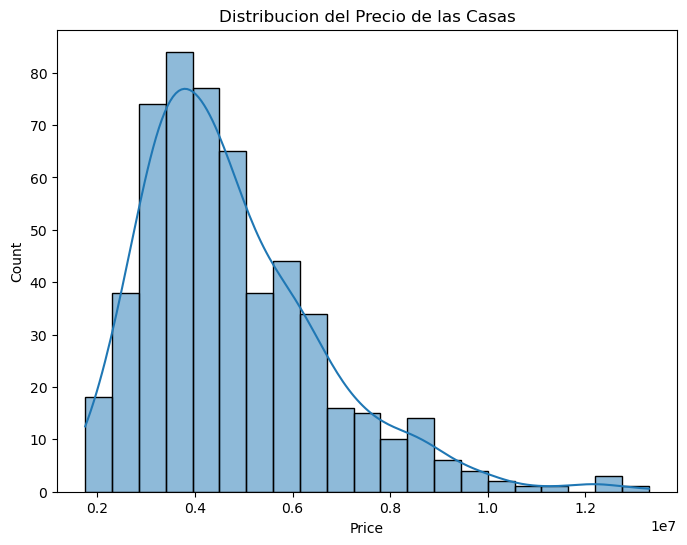

In [9]:
#Distribution of Price
plt.figure(figsize = (8,6))
sns.histplot(data['price'], kde =True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribucion del Precio de las Casas')
plt.show()

La mayor parte de la densidad se sitúa entre 100 000 y 250 000, pero parece haber muchos valores atípicos en el lado más caro.

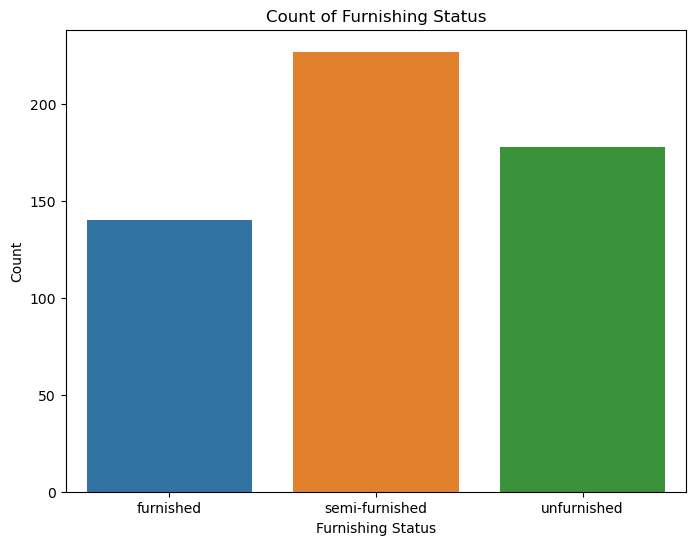

In [10]:
#Count of Furnishing Status
plt.figure(figsize = (8,6))
sns.countplot(x = 'furnishingstatus', data = data)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.title('Count of Furnishing Status')
plt.show()

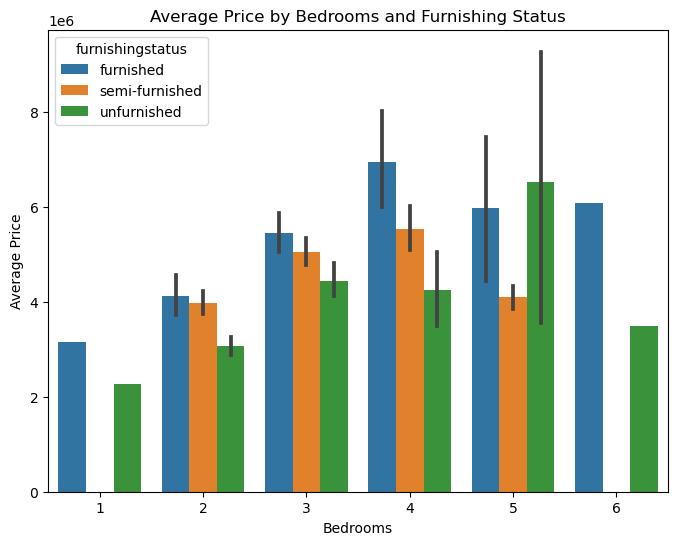

In [11]:
#Average Price by Bedrooms and Furnishing Status
plt.figure(figsize = (8,6))
sns.barplot(x = 'bedrooms', y = 'price', hue = 'furnishingstatus', data = data)
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Bedrooms and Furnishing Status')
plt.show()

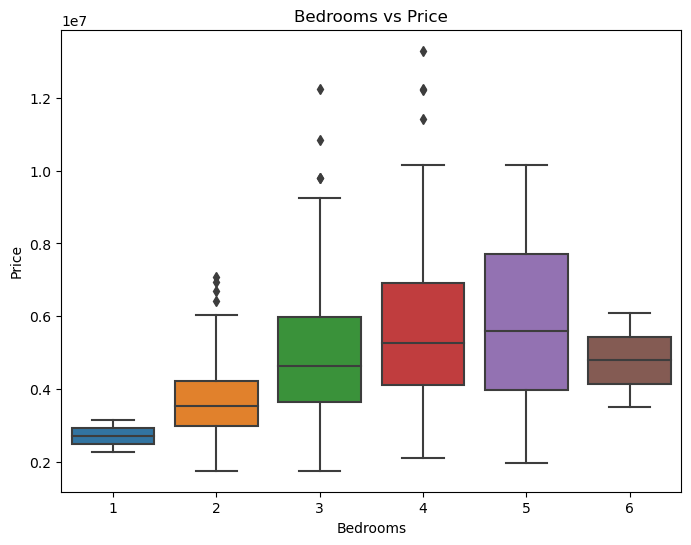

In [12]:
#Bedrooms vs Price
plt.figure(figsize = (8,6))
sns.boxplot(x = 'bedrooms', y = 'price', data = data)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()

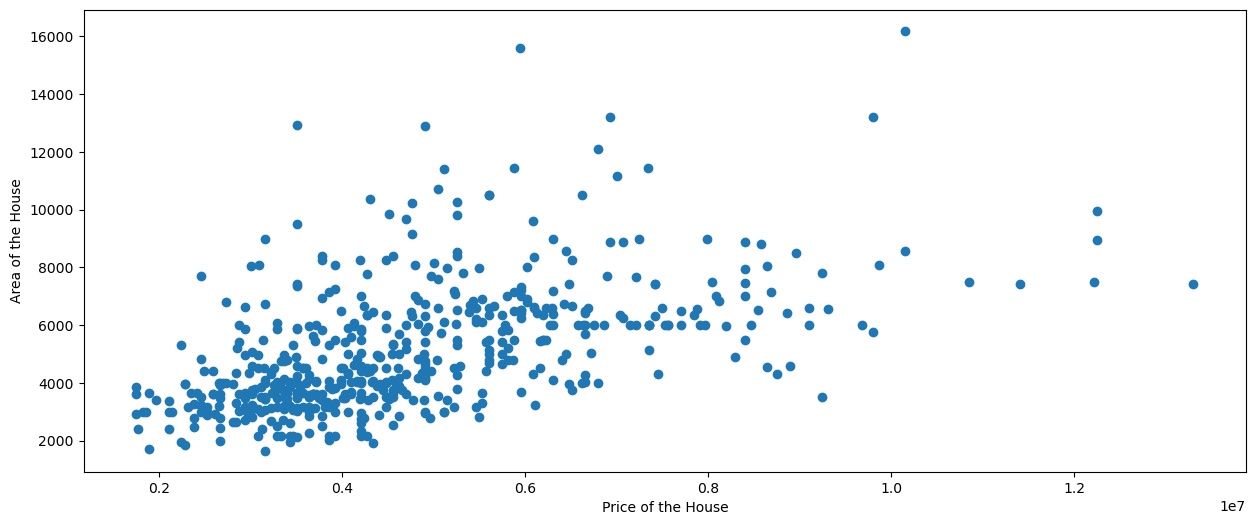

In [13]:
#Area and Price of the House
plt.scatter(data.price, data.area)
plt.xlabel('Price of the House')
plt.ylabel('Area of the House')
plt.show()

<Axes: xlabel='price', ylabel='area'>

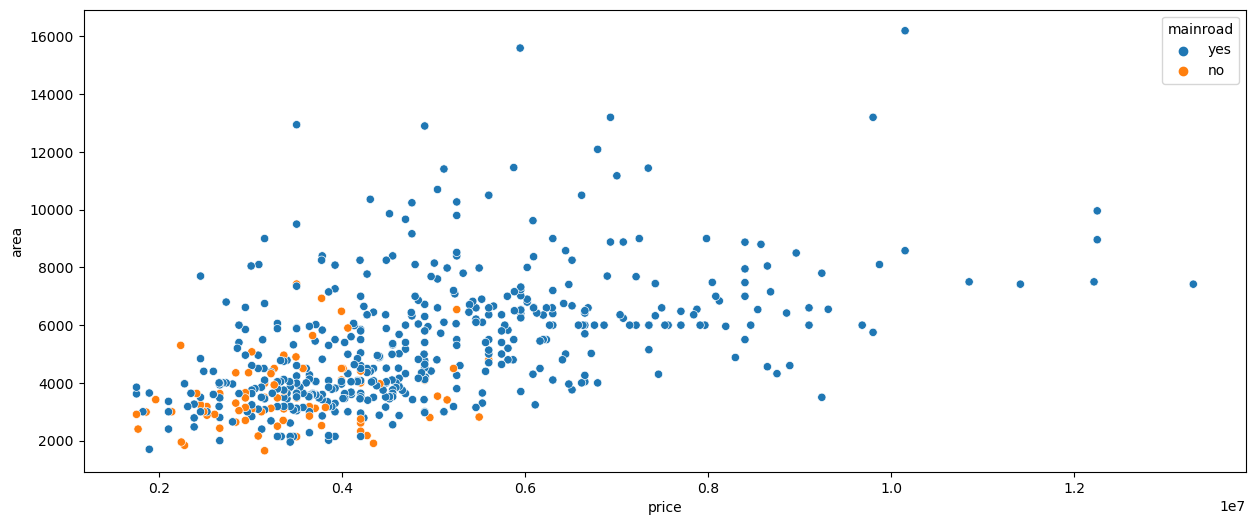

In [14]:
#Price and Area with Mainroad
sns.scatterplot(x='price',y='area',hue = 'mainroad',data=data)

<Axes: xlabel='price', ylabel='area'>

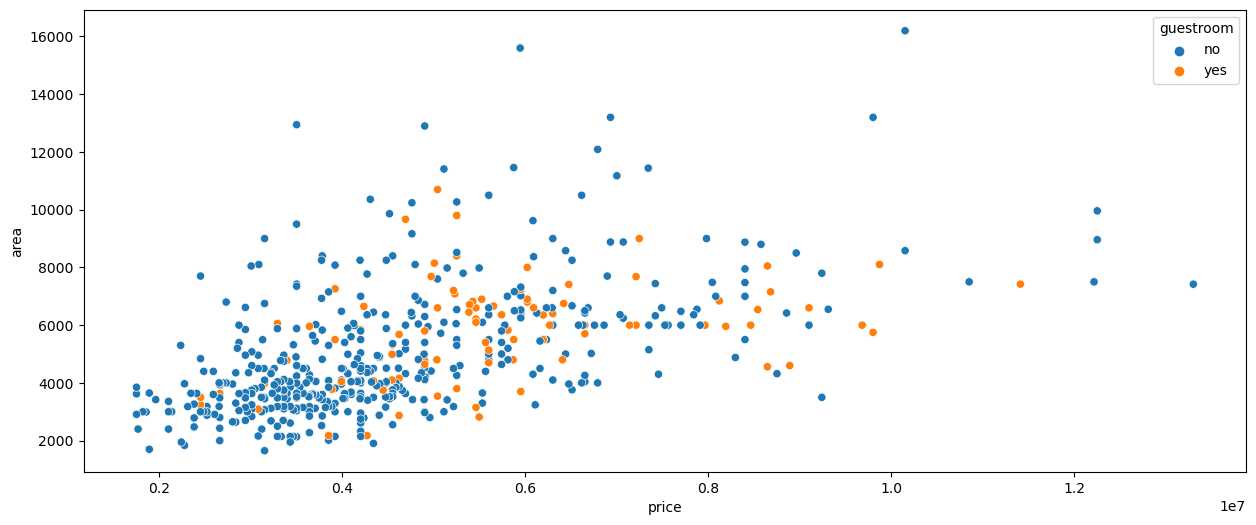

In [15]:
#Price and Area with Guestroom
sns.scatterplot(x = 'price', y = 'area', hue = 'guestroom', data = data)

<Axes: xlabel='price', ylabel='area'>

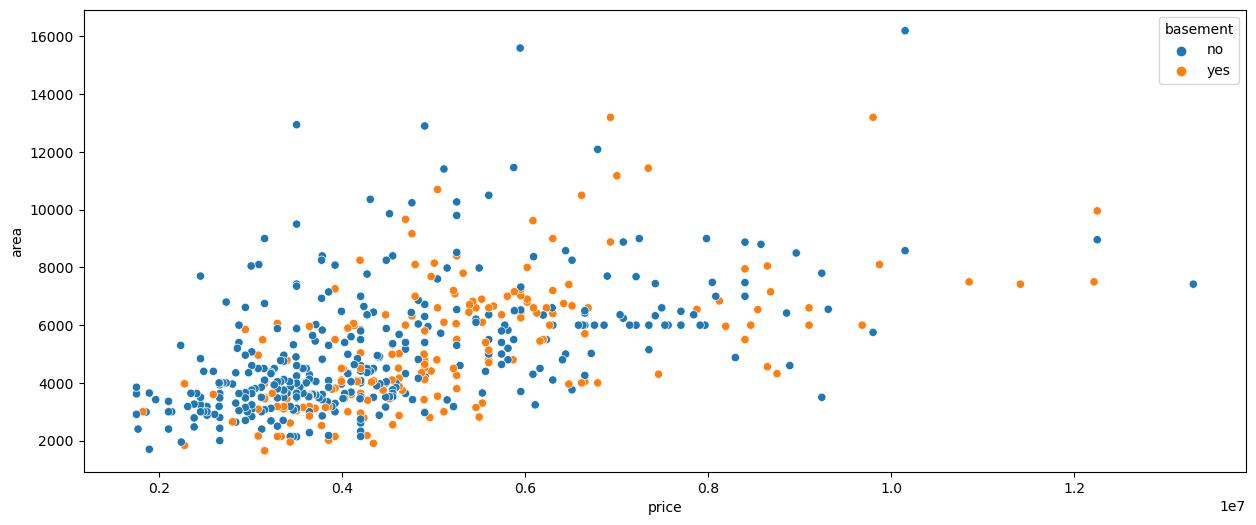

In [16]:
#Price and Area with Basement
sns.scatterplot(x = 'price', y = 'area', hue = 'basement', data = data )

<Axes: xlabel='price', ylabel='area'>

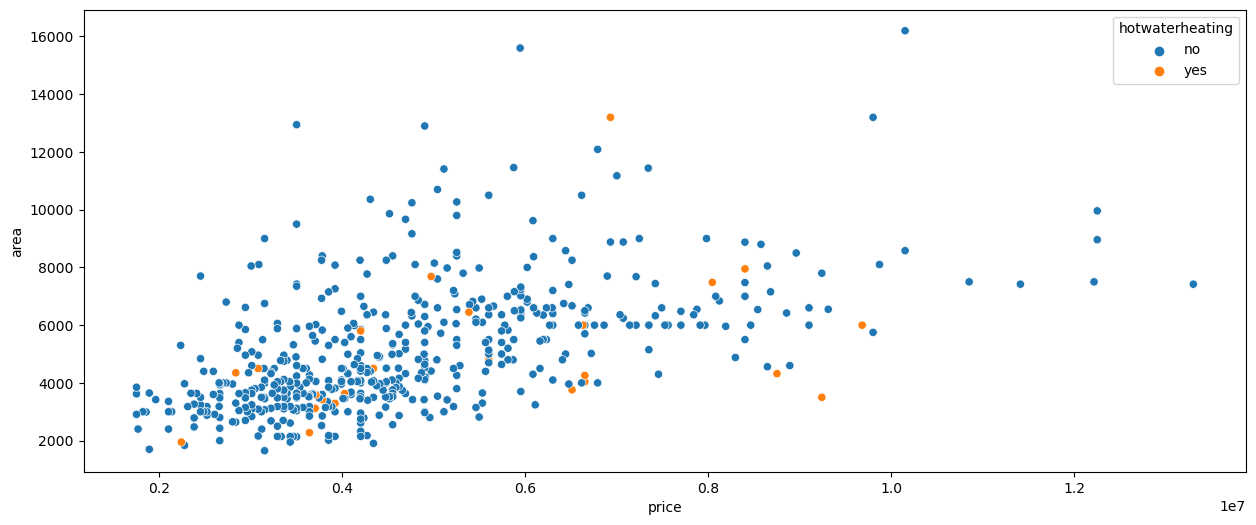

In [17]:
#Price and Area with Hot_water_heating
sns.scatterplot(x = 'price', y = 'area', hue = 'hotwaterheating', data = data)

<Axes: xlabel='price', ylabel='area'>

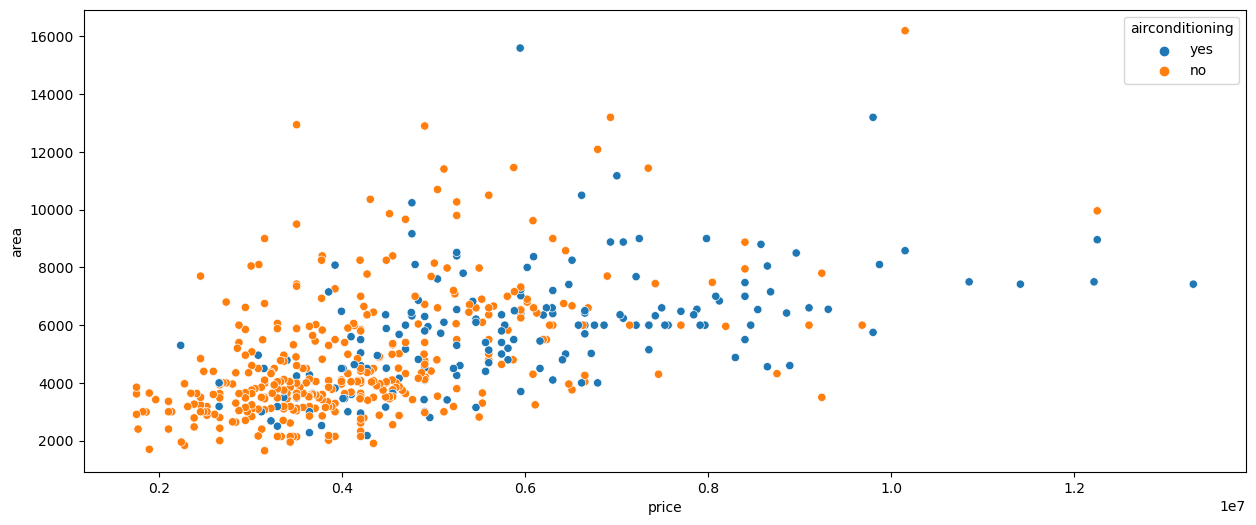

In [18]:
#Price and Area with Air_Conditioning
sns.scatterplot(x = 'price', y = 'area', hue = 'airconditioning', data = data)

#### Procesamiento de la data

In [19]:

for i in ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']:
    data[i]=data[i].replace({'yes':1,'no':0})
    


In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [21]:
data = data.replace("yes", 1)
data = data.replace("no", 0)
data = data.replace(['unfurnished', 'semi-furnished', 'furnished'], [0,1,2])

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
X = data.drop('price', axis=1)
y = data['price']

k_best = SelectKBest(score_func=f_regression, k=5)
X_selected = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Display the selected features and their scores
print("Selected Features:")
for feature, score in zip(selected_feature_names, k_best.scores_[selected_feature_indices]):
    print(f"{feature}: {score:.2f}")

Selected Features:
area: 218.88
bathrooms: 198.65
stories: 116.78
airconditioning: 140.16
parking: 94.14


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=25)

#### Modelando la data

In [24]:
#Modelo de Regresion lineal
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()

In [25]:
my_model.fit(X_train,y_train)

LinearRegression()

In [26]:
my_model.score(X_test, y_test)

0.7508425424991367

In [27]:

y=data['price']
x=data.drop('price',axis=1)
len(x.columns)

12

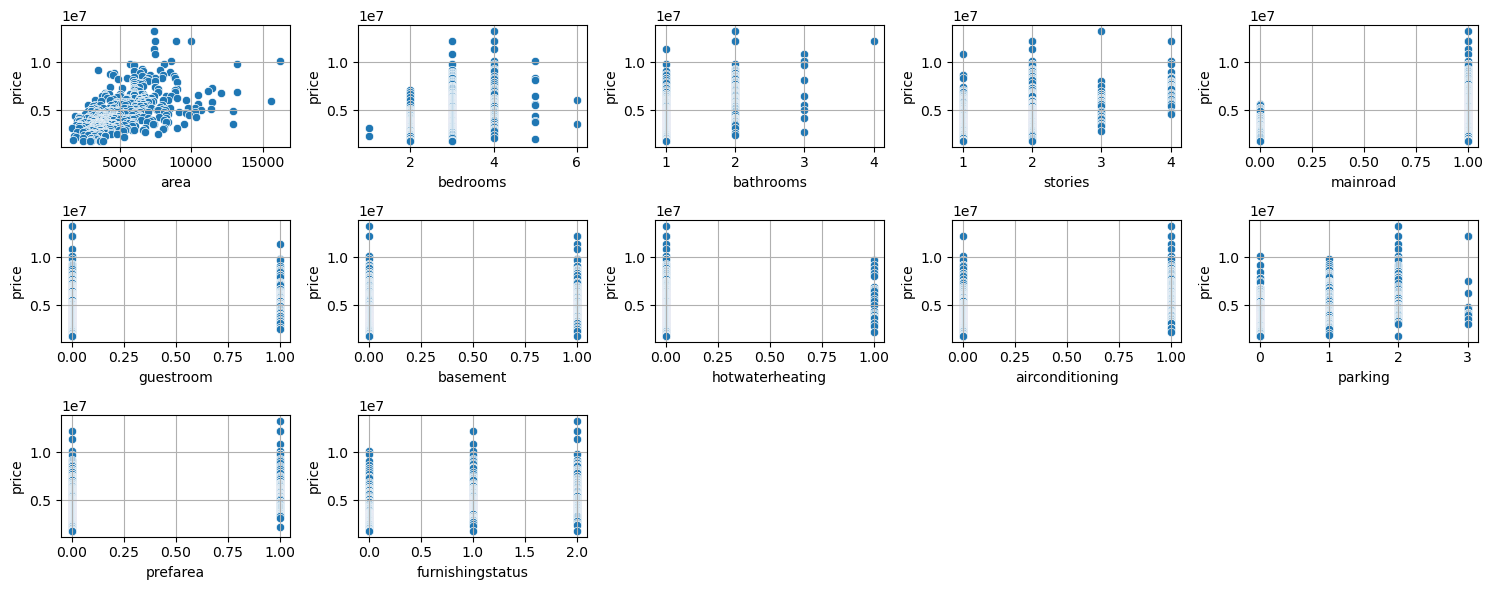

In [28]:
r=3
c=5
it=1
for i in x.columns:
    plt.subplot(r,c,it)
    sns.scatterplot(x=i,y=y,data=data)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [29]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          3.81e-123
Time:                        19:40:28   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.245e+05   2.37e+05  

In [30]:
xc=xc.drop('bedrooms',axis=1)
model=sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     102.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          1.40e-123
Time:                        19:40:30   Log-Likelihood:                -8334.4
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     533   BIC:                         1.674e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.463e+04   1.91e+05  

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

y_pred_train=my_model.predict(X_train)
y_pred_test=my_model.predict(X_test)
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))
my_model.intercept_
my_model.coef_

array([2.45860332e+02, 1.68432075e+05, 9.38446362e+05, 4.36211938e+05,
       4.34740249e+05, 2.56443277e+05, 3.83419287e+05, 8.86259012e+05,
       8.51301326e+05, 2.95648783e+05, 6.43419708e+05, 2.20448846e+05])

**RandomForestRegressor**

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf=RandomForestRegressor()
rf_model=rf.fit(X_train,y_train)
rf_model

RandomForestRegressor()

In [49]:
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)

(0.7037256784415004, 0.6708617053198351)

In [50]:
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))

(1027451.6625707899, 965306.6593086665)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
rf=RandomForestRegressor()
params=[({'n_estimators':[50,100,150,200],'max_depth':range(2,5),'max_features':["sqrt", "log2", None]})]
grd=GridSearchCV(estimator=rf,param_grid=params,cv=3)
grd_model=grd.fit(X_train,y_train)
grd_model.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}

In [56]:
rf=RandomForestRegressor(n_estimators=200,max_depth=4,max_features=None)
rf_model=rf.fit(X_train,y_train)
y_pred_train=rf_model.predict(X_train)
y_pred_test=rf_model.predict(X_test)


In [54]:
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)

(0.7067654523954578, 0.6904706091424655)

In [55]:
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))

(1022167.247086607, 936110.338006712)